# K-nearest neighbors klasifikácia 
V predošlej kapitole sme objasnili, aký je rozdiel medzi klasifikáciou a regresiou. <br>
V tejto kapitole si predstavíme jeden zo základných modelov pre klasifikáciu K-nearest neighbours. <br>
Pre lepšie pochopenie si zobrazíme naše dáta z Iris datasetu do grafu ako body.

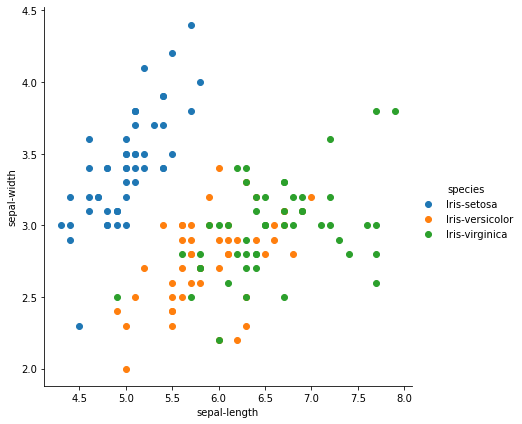

In [1]:
import seaborn as sns
import pandas
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
iris = pandas.read_csv(url, names=names)
sns.FacetGrid(iris, hue="species", height=6) \
   .map(plt.scatter, "sepal-length", "sepal-width") \
   .add_legend()

## Princíp fungovania KNN: 
* cieľom je nájsť **K** *najbližších susedov ku každému bodu* a vytvoriť oblasti bodov so spoločnými vlastnosťami, oblasti predstavujú jednotlivé kategórie datasetu
* hodnotu K si určujeme my a ovplyvňuje presnosť predikcie, respektíve rýchlosť učenia (viac o presnosti predikcie sa dozviete v kapitole 8)

Napríklad pre K=3: <br>
obrázok: KNN3.png <br>
Z obrázku vidíme, že pre daný bod prevládajú červené, takže bod sa zaradí do červenej kategórie. <br>

## Ako na to? 
1) Z knižnice Scikit-learn si naimportujeme KneighborsClassifier, čo je náš model, a dáme si ho do premennej *knn*
2) Načítame si Iris dataset do *iris*, dáta priradíme do *X* a kategórie do *y*

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
knn = KNeighborsClassifier(n_neighbors=1)
iris = load_iris()
X = iris.data
y = iris.target

## 1. otázka
(2 správne odpovede, checkox) <br>

**Čo ukladáme do premenných X a y?** <br>
(X = iris.data, y = iris.target)
1. y predstavuje 2D maticu, ktorá obsahuje úplne všetky údaje zozbierané k datasetu Iris
2. y predstavuje 1D maticu celých čísel, ktorými sú zakódované latinské názvy rastlín nášho datasetu **SPRÁVNE**
3. X predstavuje 1D maticu, ktorá obsahuje charakteristiku prvku, čiže máme na výber viacero X
4. X predstavuje dáta datasetu, čiže prvky a ich vlastnosti uložené v 2D matici **SPRÁVNE**

Pri správnej odpovedi sa zobrazí okno:
"Správne odpovede, dáta a kategórie sme si uložili do premenných kvôli uľahčeniu práce."

3) Teraz potrebujeme inicializovať model, vložiť do neho dáta X a y a na základe nich model učiť . <br>
    * v implementácii KNeighborsClassifier je premenná K označená ako *n_neighbors*
    * n_neighbors má prednastavenú hodnotu 1 a teda model bude hľadať jedného najbližšieho suseda
    * toto je aj parameter, ktorý môžeme meniť a tým ovplyvňovať celý proces

In [3]:
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=1)

4. Následne dáme modelu predikovať výsledky na základe nových, pre neho neznámych, dát.
    * našim výsledkom je číslo, ktoré reprezentuje názov druhu rastliny - virginica

In [4]:
knn.predict([[1, 5, 3, 4]])

array([2])

## 1. programovacia úloha
**V tejto úlohe spravte predikciu pomocou KNN modelu klasifikácie na Iris datasete, kde:**<br>
    * model bude hľadať 4och najbližších susedov <br>
    * prvý prvok, na ktorom budeme robiť predikciu, bude mať hodnoty: [2.5, 1.02, 3, 1.4] <br>
    * druhý prvok, na ktorom budeme robiť predikciu, bude mať hodnoty: [1.5, 7.3, 2, 5]

Pri prvom riešení sa zobrazí: Správne riešenie. <br>
Pri druhom riešení sa zobrazí: Správne riešenie, *predict* umožňuje taktiež zadávať viaceré predikcie ak ich uložíme v matici: merged = [[2.5, 1.02, 3, 1.4], [1.5, 7.3, 2, 5]], následne sa zavolá na *merged* metóda *predict*.

In [5]:
# riešenie
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
knn = KNeighborsClassifier(n_neighbors=4)
iris = load_iris()
X = iris.data
y = iris.target
knn.fit(X,y)

# 1.riešenie - spojenie predikcií do jednej premennej
merged = [[2.5, 1.02, 3, 1.4], [1.5, 7.3, 2, 5]]
knn.predict(merged)

# 2.riešenie - oddelené predikcie
prediction1 = [[2.5, 1.02, 3, 1.4]]
knn.predict(prediction1)
prediction2 = [[1.5, 7.3, 2, 5]]
knn.predict(prediction2)


array([0])

#### Materiály na dodatočné štúdium
Pre lepšie pochopenie KNN odporúčame: <br>
https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761 <br>
https://towardsdatascience.com/machine-learning-classifiers-a5cc4e1b0623